# Heart Diease Prediction

BY OLOMO RACHAEL AYOBAMI

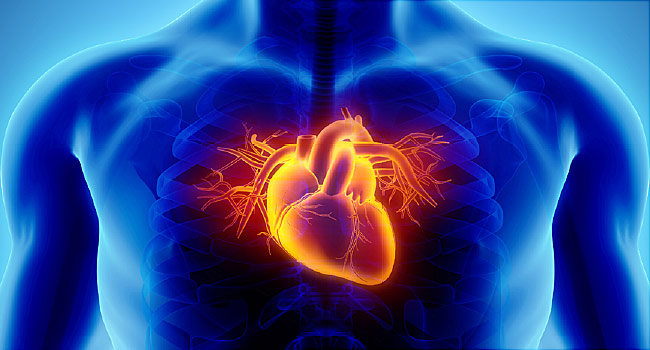

**The goal of this project is to create a machine learning model that will detect if a patient has heart disease or not.
**Age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal= independent variables
target = dependent variable**

**Objectives:
a.	Data Exploration
b.	Missing Data
c.	Outliers
d.	Train and Test with 3 models
e.	3 Models with final fine-tuned parameters
f.	Data Sampling**

****The dataset used for this project was obtained from : https://www.kaggle.com/ronitf/heart-disease-uci
**
**Here are the meanings of the abbreviations used for the independent variables:
**
Age = age
Sex = sex (0= Male; 1= Female) 
cp = chest pain type (4 values)
trestbps = resting blood pressure
chol = serum cholestoral in mg/dl
fbs = fasting blood sugar > 120 mg/dl
restecg = resting electrocardiographic results (values 0,1,2)
thalach = maximum heart rate achieved
exang = exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
slope = the slope of the peak exercise ST segment
ca = number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect****

**dependent variable: target (0 = no heart disease; 1 = heart disease)**

**This heart disease project is solves a classification problem.**

## Data Exploration

In [1]:
#importing of the data structure library
import pandas as pd

In [3]:
#importing and reading the dataset into our main code
df = pd.read_csv('heart_disease.csv')

In [4]:
# attribute information
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
#data type of our attributes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#data size; number of rows and columns
df.shape

(303, 14)

In [7]:
#the first 10 records in the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Single Variable Visualizations

In [8]:
#importing of the visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns   
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 5; 

C:\Users\AYOBAMI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='target', ylabel='count'>

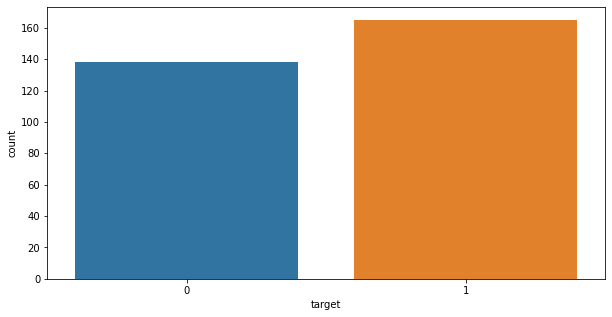

In [9]:
sns.countplot(x='target', data=df) 

<AxesSubplot:xlabel='age'>

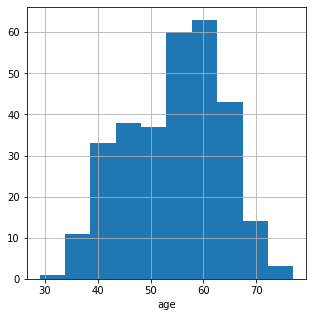

In [10]:
#histogram
plt.figure(figsize=(5,5)) 
plt.xlabel('age')
df.age.hist()  #an alternative way o

<AxesSubplot:xlabel='sex', ylabel='count'>

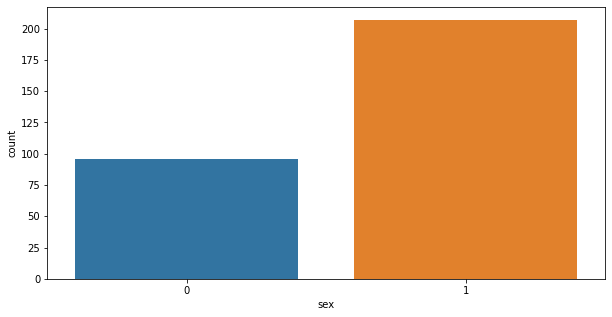

In [11]:
sns.countplot(x='sex', data=df)  # male = 0 ; female = 1

## Multiple Variable Correlations

<AxesSubplot:xlabel='target', ylabel='age'>

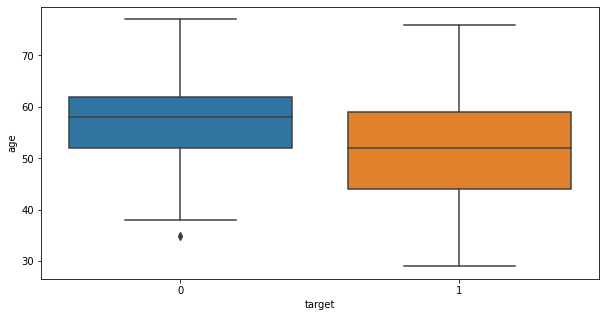

In [12]:
 #relationship between age and heart disease
 sns.boxplot(x='target', y ='age', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

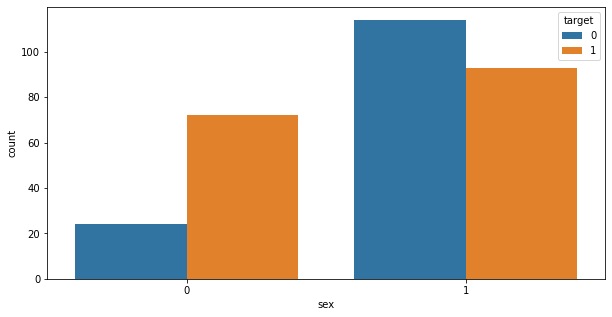

In [13]:
#relationship between gender and heart disease
# 0 = male ; 1 = female
sns.countplot(x='sex', hue='target', data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

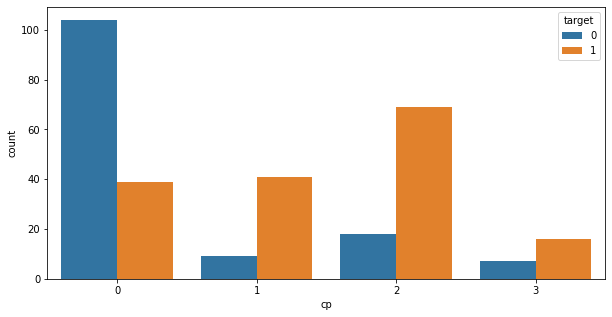

In [14]:
#relationship between chest pain and heart disease
sns.countplot(x='cp', hue='target', data=df)

In [15]:
#level of correlation between attributes in the dataset 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Missing Columns

In [16]:
# tells me the sum of missing values i have for each column (if any)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Outliers

In [17]:
# statistical summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Several machine learning algorithms make the assumption that the data follow a normal (or Gaussian) distribution. This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.**

In [18]:
print(df.skew())

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


## Dummy Coding categorical variables

In [19]:
df.cp.value_counts()  # number of people for each category

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [20]:
# number of people for each category
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [21]:
# number of people for each category
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [22]:
# number of people for each category
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [23]:
# dummy coding all categorical predictors and naming each dummy coded column
cp_dummy = pd.get_dummies(df.cp, drop_first= True)
cp_dummy.columns = ['cp_' + str(col) for col in cp_dummy.columns]
restecg_dummy = pd.get_dummies(df.restecg, drop_first= True)
restecg_dummy.columns = ['restecg_' + str(col) for col in restecg_dummy.columns]
slope_dummy = pd.get_dummies(df.slope, drop_first= True)
slope_dummy.columns = ['slope_' + str(col) for col in slope_dummy.columns]

In [24]:
# dummy coding and naming the 'thal' columns
thal_dummy = pd.get_dummies(df.thal, drop_first= True)
thal_dummy.columns = ['thal_' + str(col) for col in thal_dummy.columns]
thal_dummy.head()

,thal_1,thal_2,thal_3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [25]:
#dropping the 'thal' column with no category
#thal_dummy.drop(['thal_0'], axis=1, inplace=True)
#thal_dummy.head()

In [26]:
# dummy coding our target
target_dummy = pd.get_dummies(df.target, drop_first= True)
target_dummy.columns

Int64Index([1], dtype='int64')

In [27]:
# dropping the '0' column of target
#target_dummy.drop([0], axis=1, inplace=True)
#target_dummy.columns

In [28]:
target_dummy.columns = ['target_1']
target_dummy.columns

Index(['target_1'], dtype='object')

In [29]:
df_dummy = pd.concat([df, cp_dummy, thal_dummy, restecg_dummy, slope_dummy, target_dummy,], axis=1)

In [30]:
df_dummy.drop(['cp', 'thal', 'restecg', 'slope', 'target'], axis=1, inplace=True)
df_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3', 'restecg_1',
       'restecg_2', 'slope_1', 'slope_2', 'target_1'],
      dtype='object')

In [31]:
df_dummy.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,restecg_1,restecg_2,slope_1,slope_2,target_1
0,63,1,145,233,1,150,0,2.3,0,0,0,1,1,0,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,0,1,0,0,1,0,1,0,0,0,1
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,1,0,0,0,0,1,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,0,1,0,1,0,0,1,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,0,1,0,1,0,0,1,1


In [32]:
# dummmy coded csv file
df_dummy.to_csv('encoded_heart_disease_dummy.csv')

## Predictive Model Training

**I will be focusing on the tree models for my prediction model. Ideally, my goal is to pick the model with the best recall score. Recall because it is a test of the 'true positives' actually captured by the model i eventually will pick.

Also, i have decided to use the default parameters of each tree model for the first round of model testing. This is generally to see how the models will perform without finetunning the parameters. **

In [33]:
df_dummy.shape

(303, 20)

In [34]:
# Predictors
X = df_dummy.drop('target_1', axis=1)
X.shape

(303, 19)

In [35]:
# Target
y = df_dummy.target_1
y.shape

(303,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [37]:
# train_test split results
X_train.shape

(212, 19)

In [38]:
X_test.shape

(91, 19)

In [39]:
y_train.shape

(212,)

In [40]:
y_test.shape

(91,)

In [41]:
from sklearn import tree
dtree_clf = tree.DecisionTreeClassifier(random_state=0) #(max_leaf_nodes=3;default)  #decision tree created

In [42]:
#training my model
a = dtree_clf.fit(X_train, y_train)

In [43]:
# decision tree predict responses from x_test
dtree_clf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=uint8)

In [44]:
# to store the values of my predicted responses
dtree_pred = dtree_clf.predict(X_test)

In [45]:
# testing the accuracy of my decision tree by comparing my predicted respnses against my actual values (y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_pred)

0.6923076923076923

In [46]:
# Misclassification
1 - accuracy_score(y_test, dtree_pred)

0.3076923076923077

In [47]:
#using random forest for prediction (bagging)
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(random_state=0)
b = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.8021978021978022

In [48]:
# gradient boosting classifier (boosting)
gb_clf = ensemble.GradientBoostingClassifier(random_state=0)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

0.7802197802197802

In [49]:
# Evaluation Metrics
from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, dtree_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        50
           1       0.64      0.73      0.68        41

    accuracy                           0.69        91
   macro avg       0.69      0.70      0.69        91
weighted avg       0.70      0.69      0.69        91

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.73      0.90      0.80        41

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        50
           1       0.71      0.85      0.78        41

    accuracy                         

**From my metrics classification report as shown above, random forest performed the best overall. Especially, for the "1's" target. Not forgetting that my focus here is on the recall score. Random forest has the highest recall score out of the 3 tree models i used.**

## Model Finetunning 

For model finetunning, i started modifying the parameters for each tree model. This happened to improve on the performance score for our initially trained tree models.

In [50]:
# Finetuned Decision Tree                                                           
dtree2_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=10, random_state= 0)
_ = dtree2_clf.fit(X_train, y_train)
dtree_pred = dtree2_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)

dtree_acc

0.7912087912087912

In [51]:
#Fune Tuned Random Forest
rf2 = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=6, max_leaf_nodes=10, random_state= 0, n_jobs=-1)
_ = rf2.fit(X_train,y_train)
rf_pred = rf2.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.8021978021978022

In [52]:
# Fine Tuned gradient boosting classifier 
gb_clf2 = ensemble.GradientBoostingClassifier(loss= 'deviance',learning_rate= 0.001, n_estimators=1000, random_state= 0, max_depth= 7, max_leaf_nodes= 10)
_ = gb_clf2.fit(X_train, y_train)
gb_pred = gb_clf2.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

0.7802197802197802

In [53]:
# finetuned Evaluation Metrics
from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, dtree_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        50
           1       0.72      0.88      0.79        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.73      0.90      0.80        41

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.71      0.88      0.78        41

    accuracy                         

**from my evaluation metrics report, all the models have improved in terms of their accuracy score except for gradient boosting method which maintained it's overall accuracy score from the last training.**

In [54]:
# Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable
# feature importance for random forest (best performing model out of the finetuned models)
f_imp = []
for feature in zip(list(X_train), rf2.feature_importances_):
    f_imp.append(feature)

feature =[]
imp_score = []
for i in f_imp:
    feature.append(i[0])
    imp_score.append(i[1])

feature = pd.DataFrame(feature)
imp_score = pd.DataFrame(imp_score)

feature_imp = pd.concat([feature,imp_score],axis=1)
feature_imp.columns = ['feature', 'importance_score']
feature_imp.sort_values(by=['importance_score'], inplace=True, ascending=False)
feature_imp = round(feature_imp,5)
feature_imp.head()

,feature,importance_score
8,ca,0.16335
5,thalach,0.12537
7,oldpeak,0.10962
13,thal_2,0.10650
6,exang,0.09247


**auc-roc score for random forest (best performing model out of the finetuned models)
used for classification problems. 
It tells how well the model is able to distinguish between classes.**

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
y_pred_prob = rf2.predict_proba(X_test)[:,1]
print('AUC_score', roc_auc_score(y_test, y_pred_prob))

AUC_score 0.9146341463414634


## Data Sampling

****The goal of data sampling is still finding a way to improve on my ML models and to reduce the level of biasness for my models. This time,i decided to look at my target values. It shows my models will be better at predicting that a patient has heart disease (the 1's are slightly higher than the 0's for the target values), but i want my model to be balanced and not slightly oversampled. Therefore, i carry out data sampling to create a balnced model that will predict when a person has heart disease and vice versa.Also, i want my accuracy scores to be close to 1. **

**NB: Accuracy scores range between 0-1; 0= no accuracy, 1= maximum accuracy.****

In [57]:
df.target.value_counts()  # shows our dataset is slightly oversampled (1's), so how do we create a balance for our model?

1    165
0    138
Name: target, dtype: int64

In [58]:
import imblearn
from imblearn.combine import SMOTEENN

In [59]:
# Combination method (oversampling + undersampling)

sampler = SMOTEENN(sampling_strategy='auto', random_state= 0)
X_us, y_us = sampler.fit_sample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=50)

# decision tree
dtree3_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=10, random_state= 0)
_ = dtree3_clf.fit(X_train, y_train)
dtree_pred = dtree3_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)

print(dtree_acc)

# random forest
rf3 = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=6, max_leaf_nodes=10, random_state= 0, n_jobs=-1)
_ = rf3.fit(X_train, y_train)
rf_pred = rf3.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(rf_acc)

# gradient boosting method
gb_clf3 = ensemble.GradientBoostingClassifier(loss= 'deviance',learning_rate= 0.001, n_estimators=1000, random_state= 0, max_depth= 7, max_leaf_nodes= 10)
_ = gb_clf3.fit(X_train, y_train)
gb_pred = gb_clf3.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print(gb_acc)

from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, dtree_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))


0.8620689655172413
1.0
0.9310344827586207
.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.71      0.83        14

    accuracy                           0.86        29
   macro avg       0.89      0.86      0.86        29
weighted avg       0.89      0.86      0.86        29

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.86      0.92       

In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [61]:
# ensemble method; A balanced random forest classifier.
sampler_2 = BalancedRandomForestClassifier(sampling_strategy= 'auto', random_state=0)
X_us, y_us = sampler.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=50)

# random forest
rf4 = ensemble.RandomForestClassifier( n_estimators=1000, max_depth=6, max_leaf_nodes=10, random_state= 0, n_jobs=-1)
_ = rf4.fit(X_train, y_train)
rf_pred = rf4.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(rf_acc)

from sklearn.metrics import classification_report
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))


1.0
.....Random Forest Classification Report......
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [62]:
# Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable
# feature importance for random forest (best performing model out of the data sampling models)
f_imp = []
for feature in zip(list(X_train), rf3.feature_importances_):
    f_imp.append(feature)

feature =[]
imp_score = []
for i in f_imp:
    feature.append(i[0])
    imp_score.append(i[1])

feature = pd.DataFrame(feature)
imp_score = pd.DataFrame(imp_score)

feature_imp = pd.concat([feature,imp_score],axis=1)
feature_imp.columns = ['feature', 'importance_score']
feature_imp.sort_values(by=['importance_score'], inplace=True, ascending=False)
feature_imp = round(feature_imp,5)
feature_imp.head()

,feature,importance_score
5,thalach,0.28898
0,age,0.13592
7,oldpeak,0.09682
8,ca,0.08888
13,thal_2,0.08795


## Conclusion: My best model is the model with the balanced random classifier.